In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('User_Data.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.drop("Gender", axis=1)

In [5]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('Purchased',axis=1))

StandardScaler()

In [9]:
scaled_feat = scaler.transform(df.drop('Purchased',axis=1))

In [10]:
scaled_feat

array([[-0.93657932, -1.78179743, -1.49004624],
       [ 1.66838653, -0.25358736, -1.46068138],
       [-0.32087714, -1.11320552, -0.78528968],
       ...,
       [-0.52039175,  1.17910958, -1.46068138],
       [ 0.88695546, -0.15807423, -1.07893824],
       [-1.36231017,  1.08359645, -0.99084367]])

In [11]:
df_feat = pd.DataFrame(scaled_feat,columns=df.columns[:-1])

In [12]:
df_feat.head()

,User ID,Age,EstimatedSalary
0,-0.936579,-1.781797,-1.490046
1,1.668387,-0.253587,-1.460681
2,-0.320877,-1.113206,-0.785290
3,-1.233692,-1.017692,-0.374182
4,1.571389,-1.781797,0.183751


In [13]:
X = scaled_feat

In [14]:
X

array([[-0.93657932, -1.78179743, -1.49004624],
       [ 1.66838653, -0.25358736, -1.46068138],
       [-0.32087714, -1.11320552, -0.78528968],
       ...,
       [-0.52039175,  1.17910958, -1.46068138],
       [ 0.88695546, -0.15807423, -1.07893824],
       [-1.36231017,  1.08359645, -0.99084367]])

In [15]:
y = df['Purchased']

In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
X_train

array([[-1.70324136,  1.94321462,  0.74168287],
       [-1.35482086, -1.20871865, -1.40195167],
       [ 0.14562572,  0.31949142, -0.31545197],
       [-0.02499358, -0.92217926,  0.56549373],
       [ 0.4117337 ,  0.41500455,  0.30121002],
       [ 1.53413788,  0.41500455,  1.123426  ],
       [-0.34742506,  0.79705706,  0.77104772],
       [ 0.5929023 ,  0.89257019,  1.27025028],
       [-0.01888755, -0.44461362, -1.22576253],
       [ 0.69240111, -1.78179743, -1.3138571 ],
       [-1.32764417,  1.08359645,  0.56549373],
       [-1.13736544, -0.63563988, -1.60750566],
       [ 0.65542964, -0.73115301,  0.27184516],
       [-0.73906279,  0.98808332,  2.09246627],
       [ 1.36329502, -0.54012675,  1.38770971],
       [-0.43789758, -0.0625611 ,  0.03692631],
       [-1.57613271, -1.87731056,  0.47739916],
       [ 1.07244159,  0.41500455,  0.27184516],
       [-1.30637789, -1.01769239,  0.41866944],
       [-1.45821802,  0.22397829, -0.13926283],
       [ 0.50199663,  1.84770149,  0.125

In [20]:
X_test

array([[ 0.08221811,  0.79705706, -1.40195167],
       [-1.14394653,  2.03872775,  0.53612887],
       [ 1.19037025, -0.92217926, -0.75592482],
       [ 0.46104297,  0.98808332,  0.77104772],
       [ 0.10820713, -0.82666613, -1.22576253],
       [ 1.49673326, -0.73115301, -0.2273574 ],
       [-0.72606828,  0.89257019,  1.09406114],
       [ 1.33372902, -0.82666613,  0.38930459],
       [ 0.41990766,  0.22397829,  0.15438573],
       [-1.12812956,  0.41500455, -0.13926283],
       [ 0.49981691, -0.25358736, -0.13926283],
       [ 1.21967077,  1.46564897, -1.04957339],
       [ 1.17400835, -1.39974491, -0.63846539],
       [-1.3457247 , -1.6862843 , -1.37258681],
       [ 0.47674816, -0.73115301,  0.50676401],
       [ 1.13538811, -0.25358736,  1.123426  ],
       [-1.09720822,  1.37013584, -0.93211396],
       [-1.32118883,  0.79705706,  0.12502088],
       [ 0.04070554,  0.12846516, -0.81465453],
       [ 1.17083657,  1.75218836, -0.28608712],
       [ 1.15468425, -1.49525804, -1.255

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier()

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [24]:
predictions = knn.predict(X_test)

In [25]:
predictions

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(y_test,predictions))

[[77  3]
 [ 3 49]]


In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        80
           1       0.94      0.94      0.94        52

    accuracy                           0.95       132
   macro avg       0.95      0.95      0.95       132
weighted avg       0.95      0.95      0.95       132



In [29]:
error_rate = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

Text(0, 0.5, 'Error Rate')

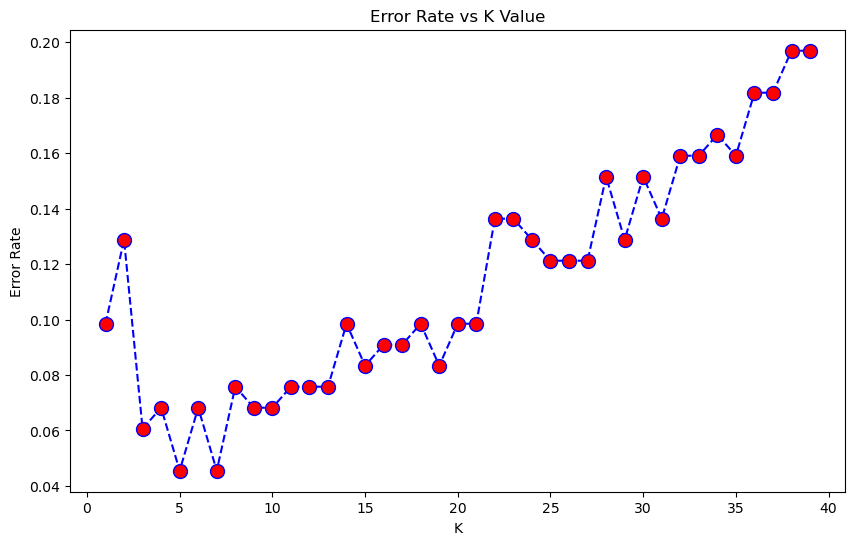

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [31]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('With k=33')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


With k=33
[[80  0]
 [21 31]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        80
           1       1.00      0.60      0.75        52

    accuracy                           0.84       132
   macro avg       0.90      0.80      0.82       132
weighted avg       0.87      0.84      0.83       132

